In [3]:
import math
import numpy as np
import pandas as pd
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas.plotting import scatter_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

#from sklearn.externals.joblib import dump
#from sklearn.externals.joblib import load
#from sklearn.feature_selection import RFE

from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

# Create one random seed number for reproducible results
seedNum = 888

# Libraries for neural network
import tensorflow
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

import joblib

In [4]:
xgb.__version__

'0.90'

In [5]:
outlier_flag = True      # Will threshold the outliers to outlier_max_value value
outlier_max_value = 9500
scale_flag = True
# scale_cols=['n_tokens_title','average_token_length']

In [6]:
# Display all columns in pandas
pd.set_option('display.max_columns', None)

### Reading data

In [7]:
inputFile = '../data/output/OnlineNewsPopularity_featureEngg_RAW.csv' #Kannan stiched this file
df = read_csv(inputFile)
df.columns = df.columns.str.replace(' ','')
print(df.shape)
df.head()

(7795, 137)


,Id,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,is__Monday,is__Tuesday,is__Wednesday,is__Thursday,is__Friday,is__Saturday,is__Sunday,is_Weekend,kw_avg_avg,kw_min_avg,kw_max_avg,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,polarity_title,subjectivity_title,polarity_content,subjectivity_content,keywords_pca_0,keywords_pca_1,keywords_pca_2,keywords_pca_3,keywords_pca_4,keywords_pca_5,keywords_pca_6,keywords_pca_7,keywords_pca_8,keywords_pca_9,content_pca_0,content_pca_1,content_pca_2,content_pca_3,content_pca_4,content_pca_5,content_pca_6,content_pca_7,content_pca_8,content_pca_9,NER_list_pca_0,NER_list_pca_1,NER_list_pca_2,NER_list_pca_3,NER_list_pca_4,NER_list_pca_5,NER_list_pca_6,NER_list_pca_7,NER_list_pca_8,NER_list_pca_9,NER_GPE,NER_DATE,NER_CARDINAL,NER_NORP,NER_PERSON,NER_TIME,NER_ORG,NER_WORK_OF_ART,NER_QUANTITY,NER_EVENT,NER_ORDINAL,NER_MONEY,NER_FAC,NER_PRODUCT,NER_LAW,NER_PERCENT,NER_LOC,NER_LANGUAGE,LDA_T0,LDA_T1,LDA_T2,LDA_T3,LDA_T4,NMF_T0,NMF_T1,NMF_T2,NMF_T3,NMF_T4,LSI_T0,LSI_T1,LSI_T2,LSI_T3,LSI_T4,LDA_C0,LDA_C1,LDA_C2,LDA_C3,LDA_C4,NMF_C0,NMF_C1,NMF_C2,NMF_C3,NMF_C4,LSI_C0,LSI_C1,LSI_C2,LSI_C3,LSI_C4,LDA_K0,LDA_K1,LDA_K2,LDA_K3,LDA_K4,NMF_K0,NMF_K1,NMF_K2,NMF_K3,NMF_K4,LSI_K0,LSI_K1,LSI_K2,LSI_K3,LSI_K4,shares
0,1,9,967,0.422958,0.467425,0.723716,7,6,0,0,4.172699,7,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1696,879,2224,0,0,0,0,0,0,0,0,0,1,0.000,0.00,0.013542,0.390972,13.136436,-0.564639,-0.715556,-0.365038,0.279909,-0.919380,0.012948,-0.423773,-0.529433,-0.417151,20.136116,20.801281,-8.014767,-13.831778,16.490318,-9.784305,2.202778,8.778829,7.295693,10.242371,71.769478,-0.305974,2.390489,-2.477139,0.053204,-0.480504,0.319525,0.988350,-0.227759,1.380270,37,16,5,10,9,2,7,1,1,0,0,0,0,0,0,0,0,0,0.033334,0.033334,0.866665,0.033334,0.033334,0.000000,0.000091,0.000629,0.014073,0.007567,0.007813,0.009402,0.014198,0.070256,0.018353,0.516403,0.452127,0.030462,0.000504,0.000505,0.000000,0.000000,0.717227,0.000000,0.080872,9.623199,-6.378876,-4.691144,-8.610361,1.096098,0.050542,0.422835,0.050000,0.050000,0.426623,0.174287,0.000000,0.000000,0.000245,0.00000,1.337091,-0.312889,-0.075335,0.014325,-0.025997,1100
1,2,14,290,0.606897,0.472414,0.596591,6,4,1,0,4.200000,9,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1986,575,2971,0,0,0,1,0,0,0,0,0,0,0.000,0.00,0.056136,0.518788,6.786283,0.691627,1.088876,0.853832,-0.138643,0.458027,0.407789,0.523944,0.875752,-0.142530,13.016478,-12.000452,11.389012,-6.300879,-1.136105,8.273910,-4.287179,3.648927,3.724643,2.798712,21.325382,-21.734667,-0.771340,-1.550308,1.541853,-0.771978,0.003611,-1.077202,1.362484,0.993559,1,3,0,0,2,0,15,1,0,1,0,0,0,0,0,0,0,0,0.033334,0.033334,0.866664,0.033334,0.033334,0.000000,0.261547,0.000000,0.000000,0.000000,0.201704,1.093181,-0.088887,-0.070484,-0.036985,0.001555,0.001578,0.993761,0.001550,0.001556,0.057206,0.324981,0.004723,0.000297,0.000000,4.020826,4.932893,-2.165460,-0.012635,0.367531,0.028572,0.171432,0.028572,0.742853,0.028572,0.000000,0.000000,0.141952,0.000000,0.16111,0.108035,0.157401,1.083466,-0.085400,0.860167,1100
2,3,10,392,0.591837,0.545918,0.698276,9,1,1,0,4.545918,6,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1829,1000,2456,0,1,0,0,0,0,0,0,0,0,-0.075,0.05,0.003831,0.348095,0.567927,0.097915,-0.608448,-1.120011,0.259292,1.026721,0.301655,0.340355,0.134292,0.656617,13.522844,22.819269,-3.552361,12.605568,-5.023582,-6.502191,6.504125,-0.497396,-4.285446,-5.146639,63.302799,-10.992071,-1.079108,5.448328,1.981348,-1.181570,0.729349,2.825014,0.221779,-1.192644,2,11,3,4,17,0,12,0,0,0,1,1,0,0,0,0,0,0,0.261271,0.033334,0.033334,0.033334,0.638726,0.000652,0.000000,0.003427,0.001326,0.003812,0.007069,0.002365,0.017024,0.007103,0.012383,0.330371,0.038521,0.001153,0.290487,0.339468

In [8]:
#Selected features through ensemble feature significance scoring
f_feature_ranking=open('../data/output/Feature_ranking_Selected.txt')
selected_features = f_feature_ranking.read().split('\n')
print(len(selected_features))
selected_features

108


['Id',
 'n_tokens_title',
 'n_tokens_content',
 'n_unique_tokens',
 'n_non_stop_words',
 'n_non_stop_unique_tokens',
 'num_hrefs',
 'num_self_hrefs',
 'num_imgs',
 'num_videos',
 'average_token_length',
 'num_keywords',
 'data_channel_is_lifestyle',
 'data_channel_is_bus',
 'data_channel_is_socmed',
 'data_channel_is_world',
 'is__Monday',
 'is__Tuesday',
 'is__Wednesday',
 'is__Thursday',
 'is__Friday',
 'is__Sunday',
 'is_Weekend',
 'kw_avg_avg',
 'kw_min_avg',
 'kw_max_avg',
 'cluster_1',
 'cluster_2',
 'cluster_3',
 'cluster_4',
 'cluster_5',
 'cluster_7',
 'cluster_8',
 'subjectivity_title',
 'subjectivity_content',
 'keywords_pca_0',
 'keywords_pca_1',
 'keywords_pca_2',
 'keywords_pca_3',
 'keywords_pca_4',
 'keywords_pca_5',
 'keywords_pca_6',
 'keywords_pca_7',
 'keywords_pca_8',
 'keywords_pca_9',
 'content_pca_0',
 'content_pca_1',
 'content_pca_2',
 'content_pca_3',
 'content_pca_4',
 'content_pca_5',
 'content_pca_6',
 'content_pca_7',
 'content_pca_8',
 'content_pca_9',
 

In [9]:
df=df[selected_features]

In [10]:
df.head(1)

,Id,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_bus,data_channel_is_socmed,data_channel_is_world,is__Monday,is__Tuesday,is__Wednesday,is__Thursday,is__Friday,is__Sunday,is_Weekend,kw_avg_avg,kw_min_avg,kw_max_avg,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_7,cluster_8,subjectivity_title,subjectivity_content,keywords_pca_0,keywords_pca_1,keywords_pca_2,keywords_pca_3,keywords_pca_4,keywords_pca_5,keywords_pca_6,keywords_pca_7,keywords_pca_8,keywords_pca_9,content_pca_0,content_pca_1,content_pca_2,content_pca_3,content_pca_4,content_pca_5,content_pca_6,content_pca_7,content_pca_8,content_pca_9,NER_list_pca_0,NER_list_pca_1,NER_list_pca_2,NER_list_pca_3,NER_list_pca_4,NER_list_pca_5,NER_list_pca_6,NER_list_pca_7,NER_list_pca_8,NER_list_pca_9,NER_GPE,NER_DATE,NER_CARDINAL,NER_NORP,NER_PERSON,NER_TIME,NER_ORG,NER_WORK_OF_ART,NER_QUANTITY,NER_EVENT,NER_ORDINAL,NER_MONEY,NER_FAC,NER_PRODUCT,NER_LAW,NER_PERCENT,NER_LOC,NER_LANGUAGE,LDA_T4,NMF_T2,LSI_T0,LSI_T1,LSI_T4,LDA_C0,LDA_C1,LDA_C2,NMF_C3,LSI_C0,LSI_C1,LSI_C2,LSI_C3,LSI_C4,LDA_K0,LDA_K2,LDA_K4,NMF_K0,NMF_K1,NMF_K2,NMF_K3,NMF_K4,LSI_K0,LSI_K1,shares
0,1,9,967,0.422958,0.467425,0.723716,7,6,0,0,4.172699,7,0,0,0,1,1,0,0,0,0,0,0,1696,879,2224,0,0,0,0,0,0,0,0.0,0.390972,13.136436,-0.564639,-0.715556,-0.365038,0.279909,-0.91938,0.012948,-0.423773,-0.529433,-0.417151,20.136116,20.801281,-8.014767,-13.831778,16.490318,-9.784305,2.202778,8.778829,7.295693,10.242371,71.769478,-0.305974,2.390489,-2.477139,0.053204,-0.480504,0.319525,0.98835,-0.227759,1.38027,37,16,5,10,9,2,7,1,1,0,0,0,0,0,0,0,0,0,0.033334,0.000629,0.007813,0.009402,0.018353,0.516403,0.452127,0.030462,0.0,9.623199,-6.378876,-4.691144,-8.610361,1.096098,0.050542,0.05,0.426623,0.174287,0.0,0.0,0.000245,0.0,1.337091,-0.312889,1100


In [11]:
# Dropping useless attributes
df.drop('Id', axis=1, inplace=True)

In [12]:
# variables for total columns, total input attributes, target column index and renaming target variable
totCol = len(df.columns)
totAttr = totCol-1
targetCol = totCol #last column
df.rename(columns={'shares': 'targetVar'}, inplace=True)

In [13]:
# Threshold the value > outlier_max_value to value outlier_max_value itself in column shares or targetVar
if outlier_flag:
    print(df[(df['targetVar'] == outlier_max_value)].shape)
    print(df[(df['targetVar'] > outlier_max_value)].shape)
    df['targetVar'] = df['targetVar'].clip(upper = outlier_max_value)
    print(df[(df['targetVar'] == outlier_max_value)].shape)
    print("shape is: ",df.shape)

(8, 107)
(384, 107)
(392, 107)
shape is:  (7795, 107)


In [14]:
#70:30 train test split
if targetCol == totCol :
    x_df = df.iloc[:,0:totAttr]
    y_df = df.iloc[:,totAttr]
else :
    x_df = df.iloc[:,1:totCol]
    y_df = df.iloc[:,0]

validation_size = 0.30
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=validation_size, random_state=seedNum)
print("x_df.shape: {} y_df.shape: {}".format(x_df.shape, y_df.shape))
print("x_train.shape: {} y_train.shape: {}".format(x_train.shape, y_train.shape))
print("x_test.shape: {} y_test.shape: {}".format(x_test.shape, y_test.shape))

x_df.shape: (7795, 106) y_df.shape: (7795,)
x_train.shape: (5456, 106) y_train.shape: (5456,)
x_test.shape: (2339, 106) y_test.shape: (2339,)


In [15]:
# visualization configs
dispCol = 3
if totAttr % dispCol == 0 :
    dispRow = totAttr // dispCol
else :
    dispRow = (totAttr // dispCol) + 1
    
# Set figure width to 16 and height to 12 (4:3 aspect ratio)
fig_size = pyplot.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 12
pyplot.rcParams["figure.figsize"] = fig_size

In [16]:
#kannan: This is decided from feature engineering / feature selection
lowAttributes=[]

In [17]:
# Removing the unselected attributes from the training and validation dataframes
#xy_train <- xy_train[, !(names(xy_train) %in% lowAttributes)]
#xy_test <- xy_test[, !(names(xy_test) %in% lowAttributes)]
xy_newdf = df.drop(lowAttributes, axis=1)

totCol = len(xy_newdf.columns)
totAttr = totCol-1
targetCol = totCol
#array = xy_newdf.values

if targetCol == totCol :
    #x_newdf = array[:,0:totAttr]
    #y_newdf = array[:,totAttr]
    x_newdf = xy_newdf.iloc[:,0:totAttr]
    y_newdf = xy_newdf.iloc[:,totAttr]

else :
    #x_newdf = array[:,1:totCol]
    #y_newdf = array[:,0]
    x_newdf = xy_newdf.iloc[:,1:totCol]
    y_newdf = xy_newdf.iloc[:,0]

validation_size = 0.30
x_train, x_test, y_train, y_test = train_test_split(x_newdf, y_newdf, test_size=validation_size, random_state=seedNum)
print("x_newdf.shape: {} y_newdf.shape: {}".format(x_newdf.shape, y_newdf.shape))
print("x_train.shape: {} y_train.shape: {}".format(x_train.shape, y_train.shape))
print("x_test.shape: {} y_test.shape: {}".format(x_test.shape, y_test.shape))

x_newdf.shape: (7795, 106) y_newdf.shape: (7795,)
x_train.shape: (5456, 106) y_train.shape: (5456,)
x_test.shape: (2339, 106) y_test.shape: (2339,)


In [18]:
x_newdf.head(1)

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_bus,data_channel_is_socmed,data_channel_is_world,is__Monday,is__Tuesday,is__Wednesday,is__Thursday,is__Friday,is__Sunday,is_Weekend,kw_avg_avg,kw_min_avg,kw_max_avg,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_7,cluster_8,subjectivity_title,subjectivity_content,keywords_pca_0,keywords_pca_1,keywords_pca_2,keywords_pca_3,keywords_pca_4,keywords_pca_5,keywords_pca_6,keywords_pca_7,keywords_pca_8,keywords_pca_9,content_pca_0,content_pca_1,content_pca_2,content_pca_3,content_pca_4,content_pca_5,content_pca_6,content_pca_7,content_pca_8,content_pca_9,NER_list_pca_0,NER_list_pca_1,NER_list_pca_2,NER_list_pca_3,NER_list_pca_4,NER_list_pca_5,NER_list_pca_6,NER_list_pca_7,NER_list_pca_8,NER_list_pca_9,NER_GPE,NER_DATE,NER_CARDINAL,NER_NORP,NER_PERSON,NER_TIME,NER_ORG,NER_WORK_OF_ART,NER_QUANTITY,NER_EVENT,NER_ORDINAL,NER_MONEY,NER_FAC,NER_PRODUCT,NER_LAW,NER_PERCENT,NER_LOC,NER_LANGUAGE,LDA_T4,NMF_T2,LSI_T0,LSI_T1,LSI_T4,LDA_C0,LDA_C1,LDA_C2,NMF_C3,LSI_C0,LSI_C1,LSI_C2,LSI_C3,LSI_C4,LDA_K0,LDA_K2,LDA_K4,NMF_K0,NMF_K1,NMF_K2,NMF_K3,NMF_K4,LSI_K0,LSI_K1
0,9,967,0.422958,0.467425,0.723716,7,6,0,0,4.172699,7,0,0,0,1,1,0,0,0,0,0,0,1696,879,2224,0,0,0,0,0,0,0,0.0,0.390972,13.136436,-0.564639,-0.715556,-0.365038,0.279909,-0.91938,0.012948,-0.423773,-0.529433,-0.417151,20.136116,20.801281,-8.014767,-13.831778,16.490318,-9.784305,2.202778,8.778829,7.295693,10.242371,71.769478,-0.305974,2.390489,-2.477139,0.053204,-0.480504,0.319525,0.98835,-0.227759,1.38027,37,16,5,10,9,2,7,1,1,0,0,0,0,0,0,0,0,0,0.033334,0.000629,0.007813,0.009402,0.018353,0.516403,0.452127,0.030462,0.0,9.623199,-6.378876,-4.691144,-8.610361,1.096098,0.050542,0.05,0.426623,0.174287,0.0,0.0,0.000245,0.0,1.337091,-0.312889


In [19]:
x_train.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_bus,data_channel_is_socmed,data_channel_is_world,is__Monday,is__Tuesday,is__Wednesday,is__Thursday,is__Friday,is__Sunday,is_Weekend,kw_avg_avg,kw_min_avg,kw_max_avg,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_7,cluster_8,subjectivity_title,subjectivity_content,keywords_pca_0,keywords_pca_1,keywords_pca_2,keywords_pca_3,keywords_pca_4,keywords_pca_5,keywords_pca_6,keywords_pca_7,keywords_pca_8,keywords_pca_9,content_pca_0,content_pca_1,content_pca_2,content_pca_3,content_pca_4,content_pca_5,content_pca_6,content_pca_7,content_pca_8,content_pca_9,NER_list_pca_0,NER_list_pca_1,NER_list_pca_2,NER_list_pca_3,NER_list_pca_4,NER_list_pca_5,NER_list_pca_6,NER_list_pca_7,NER_list_pca_8,NER_list_pca_9,NER_GPE,NER_DATE,NER_CARDINAL,NER_NORP,NER_PERSON,NER_TIME,NER_ORG,NER_WORK_OF_ART,NER_QUANTITY,NER_EVENT,NER_ORDINAL,NER_MONEY,NER_FAC,NER_PRODUCT,NER_LAW,NER_PERCENT,NER_LOC,NER_LANGUAGE,LDA_T4,NMF_T2,LSI_T0,LSI_T1,LSI_T4,LDA_C0,LDA_C1,LDA_C2,NMF_C3,LSI_C0,LSI_C1,LSI_C2,LSI_C3,LSI_C4,LDA_K0,LDA_K2,LDA_K4,NMF_K0,NMF_K1,NMF_K2,NMF_K3,NMF_K4,LSI_K0,LSI_K1
5616,17,189,0.634921,0.455026,0.608333,4,1,0,1,3.798942,7,0,0,0,0,0,0,0,0,1,0,0,2225,2174,2288,1,0,0,0,0,0,0,0.000000,0.461524,-5.959097,-1.373338,1.683136,-1.587634,-0.186436,0.011106,0.879314,-0.486422,-0.057580,0.101777,7.575408,3.952612,1.028442,9.393019,-8.075782,-1.970480,-1.702753,-4.970053,-2.733341,3.544125,34.898693,-2.668137,-1.113329,0.123655,0.646328,-0.155151,-0.717064,-1.408446,1.277369,0.772029,0,3,1,0,6,0,2,2,0,0,1,0,0,1,0,0,0,0,0.149594,0.494078,0.247460,0.066430,-0.256524,0.138779,0.002952,0.083065,0.017079,1.433652,0.121160,0.216437,0.371639,-0.391249,0.028743,0.297804,0.314107,0.000000,0.215290,0.000000,0.172117,0.000000,0.415015,1.902894
6870,12,394,0.500000,0.538071,0.654822,2,2,0,0,4.535533,7,0,0,0,1,0,0,0,1,0,0,0,1804,1200,2224,0,0,0,0,0,0,1,0.288889,0.312681,3.925468,-0.353072,-1.069448,-0.406518,1.154451,0.090239,0.066486,0.224716,-0.114879,0.261157,20.886044,-4.035719,23.265581,-19.935139,8.024605,-5.904046,-1.555664,-1.736734,-13.224283,-2.756048,12.188890,-23.260721,-0.706181,-0.508598,0.542870,1.239769,0.652368,0.828463,0.213079,-1.159845,6,5,0,3,0,0,17,1,0,0,1,0,0,1,0,0,1,0,0.313772,0.007186,0.080662,0.060710,0.266568,0.211133,0.188000,0.598797,0.000000,6.180573,0.243764,-1.154240,-2.855461,-2.049782,0.040252,0.040000,0.040259,0.173430,0.000000,0.007428,0.000000,0.000000,1.335836,-0.306786
6352,16,322,0.524845,0.487578,0.627219,10,1,1,0,4.366460,3,0,1,0,0,0,0,0,1,0,0,0,2301,2224,2449,0,1,0,0,0,0,0,1.000000,0.645195,-6.478974,0.284282,-0.834234,-1.079925,0.324608,0.627788,0.131379,-0.254197,-0.695747,0.119709,15.609788,-10.712171,11.687694,-7.684834,-8.835175,3.988569,-7.925062,8.041782,-5.838991,-0.983151,21.526173,-20.824898,0.305956,0.718214,1.722503,1.305421,0.907354,-1.018463,-1.417109,-0.627926,0,3,3,0,2,0,15,0,0,0,0,5,0,0,0,0,0,0,0.066668,0.003570,0.020037,0.014733,0.008921,0.023493,0.018416,0.955254,0.012319,2.922663,1.395597,0.056146,-0.130541,-0.740134,0.066667,0.066667,0.066667,0.000000,0.000000,0.000000,0.000000,0.157804,0.026843,0.043422
2223,6,1671,0.451825,0.463794,0.762914,30,29,0,0,3.968881,6,0,0,0,0,0,0,0,0,0,1,1,2371,2116,2679,0,0,0,0,0,0,0,1.000000,0.515092,-4.790280,-0.556215,-1.195813,0.130851,0.508641,0.605079,1.073307,0.027251,-0.309498,0.963911,36.797775,21.673395,-14.148977,28.781984,-14.199660,-2.696584,-5.404723,18.520157,0.640074,-17.145313,82.899734,-64.012558,-16.349106,15.653912,9.586839,-4.428814,3.772096,11.258760,-1.589514,0.245153,15,33,10,2,27,2,22,0,1,10,0,0,4,1,1,0,0,0,0.400039,0.003453,0.007025,0.001406,0.012344,0.000290,0.000290,0.000290,0.000000,11.806715,-1.226398,9.116110,8.293416,-6.939081,0.578843,0.033333,0.321157,0.003203,0.000000,0.005718,0.172623,0.007579,0.148453,0.460744
1276,15,424,0.4

In [20]:
x_test.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_bus,data_channel_is_socmed,data_channel_is_world,is__Monday,is__Tuesday,is__Wednesday,is__Thursday,is__Friday,is__Sunday,is_Weekend,kw_avg_avg,kw_min_avg,kw_max_avg,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_7,cluster_8,subjectivity_title,subjectivity_content,keywords_pca_0,keywords_pca_1,keywords_pca_2,keywords_pca_3,keywords_pca_4,keywords_pca_5,keywords_pca_6,keywords_pca_7,keywords_pca_8,keywords_pca_9,content_pca_0,content_pca_1,content_pca_2,content_pca_3,content_pca_4,content_pca_5,content_pca_6,content_pca_7,content_pca_8,content_pca_9,NER_list_pca_0,NER_list_pca_1,NER_list_pca_2,NER_list_pca_3,NER_list_pca_4,NER_list_pca_5,NER_list_pca_6,NER_list_pca_7,NER_list_pca_8,NER_list_pca_9,NER_GPE,NER_DATE,NER_CARDINAL,NER_NORP,NER_PERSON,NER_TIME,NER_ORG,NER_WORK_OF_ART,NER_QUANTITY,NER_EVENT,NER_ORDINAL,NER_MONEY,NER_FAC,NER_PRODUCT,NER_LAW,NER_PERCENT,NER_LOC,NER_LANGUAGE,LDA_T4,NMF_T2,LSI_T0,LSI_T1,LSI_T4,LDA_C0,LDA_C1,LDA_C2,NMF_C3,LSI_C0,LSI_C1,LSI_C2,LSI_C3,LSI_C4,LDA_K0,LDA_K2,LDA_K4,NMF_K0,NMF_K1,NMF_K2,NMF_K3,NMF_K4,LSI_K0,LSI_K1
4410,13,270,0.577778,0.437037,0.564103,6,3,0,1,3.777778,8,0,0,0,1,0,0,1,0,0,0,0,1806,846,2255,1,0,0,0,0,0,0,0.000000,0.444156,2.371106,0.908159,-1.506181,-0.174758,0.550984,-1.243707,-0.477734,0.871323,-0.638430,-0.083196,13.088806,12.256122,2.255146,0.642883,5.468109,-6.413294,3.978298,9.780233,1.209823,-3.322369,25.099144,18.336580,1.068650,-1.330211,-0.120420,-1.199130,-1.500100,-1.607329,0.091908,-1.181179,10,2,0,0,7,1,4,0,0,0,0,2,1,0,0,0,0,0,0.299914,0.000136,0.000821,0.000951,0.002623,0.187853,0.153518,0.001973,0.007174,2.393880,-0.233783,1.497924,0.277495,0.764721,0.439899,0.440029,0.040000,0.000000,0.163459,0.000000,0.000000,0.000000,0.243160,1.078530
7387,6,1044,0.441571,0.500958,0.754881,3,3,0,0,4.227011,9,0,0,0,0,0,0,0,0,1,0,0,2211,1215,2679,0,0,0,0,0,0,1,0.300000,0.579851,-4.732383,-1.641393,0.113750,0.268086,-1.584236,-0.341706,-0.696985,-0.067413,0.836606,-0.249591,27.296144,-31.404490,29.189899,6.972684,-14.114314,6.146254,-2.617934,-11.259977,10.475517,-6.938231,38.012901,-25.951107,0.983708,-1.071599,0.956732,1.032380,0.025047,-1.249465,-1.577117,-1.521343,1,7,7,0,6,2,23,1,0,0,0,0,1,0,0,0,0,0,0.299977,0.002816,0.042594,0.133009,0.059322,0.000424,0.000422,0.998296,0.000000,12.578504,11.518285,-1.814356,1.060425,-3.489442,0.274971,0.025000,0.025000,0.000050,0.000000,0.212056,0.003071,0.008518,0.131339,0.174241
4532,10,351,0.535613,0.495726,0.654255,6,2,2,0,4.094017,10,0,0,1,0,0,0,0,1,0,0,0,2385,1008,3940,0,0,0,0,0,0,0,0.500000,0.269378,5.246181,0.609852,0.365328,-0.499658,-0.503101,-0.444127,0.291205,-0.364850,-0.598548,-0.526090,10.496860,5.190913,2.919482,-8.796712,6.250977,8.351804,9.891414,9.457913,3.421950,-13.970898,42.599194,-8.193209,-4.070135,-2.434064,-1.251123,0.180419,-1.148494,0.608276,-1.449153,-0.789655,7,12,9,2,4,0,3,0,1,1,0,2,0,0,0,2,0,0,0.066668,0.001733,0.026360,0.022389,0.021807,0.326087,0.400227,0.194155,0.000000,2.270466,-0.595358,0.152707,-1.195093,-0.335773,0.897715,0.025278,0.025387,0.177696,0.001034,0.003737,0.000000,0.000000,1.371573,-0.295893
5493,11,344,0.494186,0.424419,0.558824,4,4,1,0,4.026163,6,0,0,0,0,0,0,0,1,0,0,0,2210,2018,2349,0,0,0,0,0,0,0,0.000000,0.461640,-1.961071,-1.797345,0.081749,-0.765351,-0.216693,-0.127448,0.952723,-0.269825,1.123261,-0.148758,11.615919,9.158617,5.463990,11.570803,8.004614,-17.072777,-4.915672,0.281286,-2.412691,1.465724,-9.475216,-3.366126,0.047978,-1.171140,-0.396972,0.303006,-1.103772,0.229005,0.661609,0.658815,0,3,2,0,7,0,14,0,0,0,0,0,0,0,0,0,0,0,0.050001,0.001705,0.021980,0.002415,0.025720,0.850994,0.001614,0.001628,0.000000,3.304931,-1.934283,-0.975340,-2.025982,-0.149501,0.638891,0.040000,0.041164,0.000000,0.000000,0.000000,0.187548,0.000000,0.122388,0.511127
7563,12,665,0.511278,0.4

In [21]:
scale_cols=['n_tokens_title','n_tokens_content', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'num_keywords',
           'kw_avg_avg', 'kw_min_avg', 'kw_max_avg', 'NER_GPE', 'NER_DATE', 'NER_CARDINAL','NER_NORP','NER_PERSON',
           'NER_TIME', 'NER_ORG', 'NER_WORK_OF_ART', 'NER_QUANTITY', 'NER_EVENT', 'NER_ORDINAL', 'NER_MONEY',
           'NER_FAC', 'NER_PRODUCT', 'NER_LAW', 'NER_PERCENT', 'NER_LOC', 'NER_LANGUAGE']

In [22]:
x_train.head(2)

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_bus,data_channel_is_socmed,data_channel_is_world,is__Monday,is__Tuesday,is__Wednesday,is__Thursday,is__Friday,is__Sunday,is_Weekend,kw_avg_avg,kw_min_avg,kw_max_avg,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_7,cluster_8,subjectivity_title,subjectivity_content,keywords_pca_0,keywords_pca_1,keywords_pca_2,keywords_pca_3,keywords_pca_4,keywords_pca_5,keywords_pca_6,keywords_pca_7,keywords_pca_8,keywords_pca_9,content_pca_0,content_pca_1,content_pca_2,content_pca_3,content_pca_4,content_pca_5,content_pca_6,content_pca_7,content_pca_8,content_pca_9,NER_list_pca_0,NER_list_pca_1,NER_list_pca_2,NER_list_pca_3,NER_list_pca_4,NER_list_pca_5,NER_list_pca_6,NER_list_pca_7,NER_list_pca_8,NER_list_pca_9,NER_GPE,NER_DATE,NER_CARDINAL,NER_NORP,NER_PERSON,NER_TIME,NER_ORG,NER_WORK_OF_ART,NER_QUANTITY,NER_EVENT,NER_ORDINAL,NER_MONEY,NER_FAC,NER_PRODUCT,NER_LAW,NER_PERCENT,NER_LOC,NER_LANGUAGE,LDA_T4,NMF_T2,LSI_T0,LSI_T1,LSI_T4,LDA_C0,LDA_C1,LDA_C2,NMF_C3,LSI_C0,LSI_C1,LSI_C2,LSI_C3,LSI_C4,LDA_K0,LDA_K2,LDA_K4,NMF_K0,NMF_K1,NMF_K2,NMF_K3,NMF_K4,LSI_K0,LSI_K1
5616,17,189,0.634921,0.455026,0.608333,4,1,0,1,3.798942,7,0,0,0,0,0,0,0,0,1,0,0,2225,2174,2288,1,0,0,0,0,0,0,0.000000,0.461524,-5.959097,-1.373338,1.683136,-1.587634,-0.186436,0.011106,0.879314,-0.486422,-0.057580,0.101777,7.575408,3.952612,1.028442,9.393019,-8.075782,-1.970480,-1.702753,-4.970053,-2.733341,3.544125,34.898693,-2.668137,-1.113329,0.123655,0.646328,-0.155151,-0.717064,-1.408446,1.277369,0.772029,0,3,1,0,6,0,2,2,0,0,1,0,0,1,0,0,0,0,0.149594,0.494078,0.247460,0.06643,-0.256524,0.138779,0.002952,0.083065,0.017079,1.433652,0.121160,0.216437,0.371639,-0.391249,0.028743,0.297804,0.314107,0.00000,0.21529,0.000000,0.172117,0.0,0.415015,1.902894
6870,12,394,0.500000,0.538071,0.654822,2,2,0,0,4.535533,7,0,0,0,1,0,0,0,1,0,0,0,1804,1200,2224,0,0,0,0,0,0,1,0.288889,0.312681,3.925468,-0.353072,-1.069448,-0.406518,1.154451,0.090239,0.066486,0.224716,-0.114879,0.261157,20.886044,-4.035719,23.265581,-19.935139,8.024605,-5.904046,-1.555664,-1.736734,-13.224283,-2.756048,12.188890,-23.260721,-0.706181,-0.508598,0.542870,1.239769,0.652368,0.828463,0.213079,-1.159845,6,5,0,3,0,0,17,1,0,0,1,0,0,1,0,0,1,0,0.313772,0.007186,0.080662,0.06071,0.266568,0.211133,0.188000,0.598797,0.000000,6.180573,0.243764,-1.154240,-2.855461,-2.049782,0.040252,0.040000,0.040259,0.17343,0.00000,0.007428,0.000000,0.0,1.335836,-0.306786


In [23]:
if scale_flag:
    feature_scaler = StandardScaler()
    x_train[scale_cols] = feature_scaler.fit_transform(x_train[scale_cols])

In [24]:
x_train.head(2)

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_bus,data_channel_is_socmed,data_channel_is_world,is__Monday,is__Tuesday,is__Wednesday,is__Thursday,is__Friday,is__Sunday,is_Weekend,kw_avg_avg,kw_min_avg,kw_max_avg,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_7,cluster_8,subjectivity_title,subjectivity_content,keywords_pca_0,keywords_pca_1,keywords_pca_2,keywords_pca_3,keywords_pca_4,keywords_pca_5,keywords_pca_6,keywords_pca_7,keywords_pca_8,keywords_pca_9,content_pca_0,content_pca_1,content_pca_2,content_pca_3,content_pca_4,content_pca_5,content_pca_6,content_pca_7,content_pca_8,content_pca_9,NER_list_pca_0,NER_list_pca_1,NER_list_pca_2,NER_list_pca_3,NER_list_pca_4,NER_list_pca_5,NER_list_pca_6,NER_list_pca_7,NER_list_pca_8,NER_list_pca_9,NER_GPE,NER_DATE,NER_CARDINAL,NER_NORP,NER_PERSON,NER_TIME,NER_ORG,NER_WORK_OF_ART,NER_QUANTITY,NER_EVENT,NER_ORDINAL,NER_MONEY,NER_FAC,NER_PRODUCT,NER_LAW,NER_PERCENT,NER_LOC,NER_LANGUAGE,LDA_T4,NMF_T2,LSI_T0,LSI_T1,LSI_T4,LDA_C0,LDA_C1,LDA_C2,NMF_C3,LSI_C0,LSI_C1,LSI_C2,LSI_C3,LSI_C4,LDA_K0,LDA_K2,LDA_K4,NMF_K0,NMF_K1,NMF_K2,NMF_K3,NMF_K4,LSI_K0,LSI_K1
5616,2.176124,-0.806481,0.634921,0.455026,0.608333,-0.465893,-0.639936,-0.454457,0.704491,3.798942,0.021958,0,0,0,0,0,0,0,0,1,0,0,-0.021469,1.088771,-0.524687,1,0,0,0,0,0,0,0.000000,0.461524,-5.959097,-1.373338,1.683136,-1.587634,-0.186436,0.011106,0.879314,-0.486422,-0.057580,0.101777,7.575408,3.952612,1.028442,9.393019,-8.075782,-1.970480,-1.702753,-4.970053,-2.733341,3.544125,34.898693,-2.668137,-1.113329,0.123655,0.646328,-0.155151,-0.717064,-1.408446,1.277369,0.772029,-0.688262,-0.565620,-0.591044,-0.472117,-0.344783,-0.565614,-0.766606,0.449966,-0.295708,-0.29375,-0.014827,-0.417391,-0.405032,0.263634,-0.194825,-0.27566,-0.388596,-0.117931,0.149594,0.494078,0.247460,0.06643,-0.256524,0.138779,0.002952,0.083065,0.017079,1.433652,0.121160,0.216437,0.371639,-0.391249,0.028743,0.297804,0.314107,0.00000,0.21529,0.000000,0.172117,0.0,0.415015,1.902894
6870,0.353724,-0.439378,0.500000,0.538071,0.654822,-0.665494,-0.364473,-0.454457,-0.437768,4.535533,0.021958,0,0,0,1,0,0,0,1,0,0,0,-1.100951,-0.777600,-0.573123,0,0,0,0,0,0,1,0.288889,0.312681,3.925468,-0.353072,-1.069448,-0.406518,1.154451,0.090239,0.066486,0.224716,-0.114879,0.261157,20.886044,-4.035719,23.265581,-19.935139,8.024605,-5.904046,-1.555664,-1.736734,-13.224283,-2.756048,12.188890,-23.260721,-0.706181,-0.508598,0.542870,1.239769,0.652368,0.828463,0.213079,-1.159845,-0.042139,-0.330208,-0.754537,0.301031,-0.784610,-0.565614,0.604649,0.025223,-0.295708,-0.29375,-0.014827,-0.417391,-0.405032,0.263634,-0.194825,-0.27566,0.098354,-0.117931,0.313772,0.007186,0.080662,0.06071,0.266568,0.211133,0.188000,0.598797,0.000000,6.180573,0.243764,-1.154240,-2.855461,-2.049782,0.040252,0.040000,0.040259,0.17343,0.00000,0.007428,0.000000,0.0,1.335836,-0.306786


In [25]:
x_test.head(2)

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_bus,data_channel_is_socmed,data_channel_is_world,is__Monday,is__Tuesday,is__Wednesday,is__Thursday,is__Friday,is__Sunday,is_Weekend,kw_avg_avg,kw_min_avg,kw_max_avg,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_7,cluster_8,subjectivity_title,subjectivity_content,keywords_pca_0,keywords_pca_1,keywords_pca_2,keywords_pca_3,keywords_pca_4,keywords_pca_5,keywords_pca_6,keywords_pca_7,keywords_pca_8,keywords_pca_9,content_pca_0,content_pca_1,content_pca_2,content_pca_3,content_pca_4,content_pca_5,content_pca_6,content_pca_7,content_pca_8,content_pca_9,NER_list_pca_0,NER_list_pca_1,NER_list_pca_2,NER_list_pca_3,NER_list_pca_4,NER_list_pca_5,NER_list_pca_6,NER_list_pca_7,NER_list_pca_8,NER_list_pca_9,NER_GPE,NER_DATE,NER_CARDINAL,NER_NORP,NER_PERSON,NER_TIME,NER_ORG,NER_WORK_OF_ART,NER_QUANTITY,NER_EVENT,NER_ORDINAL,NER_MONEY,NER_FAC,NER_PRODUCT,NER_LAW,NER_PERCENT,NER_LOC,NER_LANGUAGE,LDA_T4,NMF_T2,LSI_T0,LSI_T1,LSI_T4,LDA_C0,LDA_C1,LDA_C2,NMF_C3,LSI_C0,LSI_C1,LSI_C2,LSI_C3,LSI_C4,LDA_K0,LDA_K2,LDA_K4,NMF_K0,NMF_K1,NMF_K2,NMF_K3,NMF_K4,LSI_K0,LSI_K1
4410,13,270,0.577778,0.437037,0.564103,6,3,0,1,3.777778,8,0,0,0,1,0,0,1,0,0,0,0,1806,846,2255,1,0,0,0,0,0,0,0.0,0.444156,2.371106,0.908159,-1.506181,-0.174758,0.550984,-1.243707,-0.477734,0.871323,-0.638430,-0.083196,13.088806,12.256122,2.255146,0.642883,5.468109,-6.413294,3.978298,9.780233,1.209823,-3.322369,25.099144,18.336580,1.068650,-1.330211,-0.120420,-1.19913,-1.500100,-1.607329,0.091908,-1.181179,10,2,0,0,7,1,4,0,0,0,0,2,1,0,0,0,0,0,0.299914,0.000136,0.000821,0.000951,0.002623,0.187853,0.153518,0.001973,0.007174,2.393880,-0.233783,1.497924,0.277495,0.764721,0.439899,0.440029,0.040,0.00000,0.163459,0.000000,0.000000,0.000000,0.243160,1.078530
7387,6,1044,0.441571,0.500958,0.754881,3,3,0,0,4.227011,9,0,0,0,0,0,0,0,0,1,0,0,2211,1215,2679,0,0,0,0,0,0,1,0.3,0.579851,-4.732383,-1.641393,0.113750,0.268086,-1.584236,-0.341706,-0.696985,-0.067413,0.836606,-0.249591,27.296144,-31.404490,29.189899,6.972684,-14.114314,6.146254,-2.617934,-11.259977,10.475517,-6.938231,38.012901,-25.951107,0.983708,-1.071599,0.956732,1.03238,0.025047,-1.249465,-1.577117,-1.521343,1,7,7,0,6,2,23,1,0,0,0,0,1,0,0,0,0,0,0.299977,0.002816,0.042594,0.133009,0.059322,0.000424,0.000422,0.998296,0.000000,12.578504,11.518285,-1.814356,1.060425,-3.489442,0.274971,0.025000,0.025,0.00005,0.000000,0.212056,0.003071,0.008518,0.131339,0.174241


In [26]:
if scale_flag:
    x_test[scale_cols] = feature_scaler.transform(x_test[scale_cols])

In [27]:
x_test.head(2)

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_bus,data_channel_is_socmed,data_channel_is_world,is__Monday,is__Tuesday,is__Wednesday,is__Thursday,is__Friday,is__Sunday,is_Weekend,kw_avg_avg,kw_min_avg,kw_max_avg,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_7,cluster_8,subjectivity_title,subjectivity_content,keywords_pca_0,keywords_pca_1,keywords_pca_2,keywords_pca_3,keywords_pca_4,keywords_pca_5,keywords_pca_6,keywords_pca_7,keywords_pca_8,keywords_pca_9,content_pca_0,content_pca_1,content_pca_2,content_pca_3,content_pca_4,content_pca_5,content_pca_6,content_pca_7,content_pca_8,content_pca_9,NER_list_pca_0,NER_list_pca_1,NER_list_pca_2,NER_list_pca_3,NER_list_pca_4,NER_list_pca_5,NER_list_pca_6,NER_list_pca_7,NER_list_pca_8,NER_list_pca_9,NER_GPE,NER_DATE,NER_CARDINAL,NER_NORP,NER_PERSON,NER_TIME,NER_ORG,NER_WORK_OF_ART,NER_QUANTITY,NER_EVENT,NER_ORDINAL,NER_MONEY,NER_FAC,NER_PRODUCT,NER_LAW,NER_PERCENT,NER_LOC,NER_LANGUAGE,LDA_T4,NMF_T2,LSI_T0,LSI_T1,LSI_T4,LDA_C0,LDA_C1,LDA_C2,NMF_C3,LSI_C0,LSI_C1,LSI_C2,LSI_C3,LSI_C4,LDA_K0,LDA_K2,LDA_K4,NMF_K0,NMF_K1,NMF_K2,NMF_K3,NMF_K4,LSI_K0,LSI_K1
4410,0.718204,-0.661431,0.577778,0.437037,0.564103,-0.266293,-0.08901,-0.454457,0.704491,3.777778,0.559190,0,0,0,1,0,0,1,0,0,0,0,-1.095823,-1.455932,-0.549662,1,0,0,0,0,0,0,0.0,0.444156,2.371106,0.908159,-1.506181,-0.174758,0.550984,-1.243707,-0.477734,0.871323,-0.638430,-0.083196,13.088806,12.256122,2.255146,0.642883,5.468109,-6.413294,3.978298,9.780233,1.209823,-3.322369,25.099144,18.336580,1.068650,-1.330211,-0.120420,-1.19913,-1.500100,-1.607329,0.091908,-1.181179,0.388609,-0.683327,-0.754537,-0.472117,-0.271479,-0.032904,-0.583772,-0.399520,-0.295708,-0.29375,-0.576602,0.395635,0.18568,-0.454842,-0.194825,-0.27566,-0.388596,-0.117931,0.299914,0.000136,0.000821,0.000951,0.002623,0.187853,0.153518,0.001973,0.007174,2.393880,-0.233783,1.497924,0.277495,0.764721,0.439899,0.440029,0.040,0.00000,0.163459,0.000000,0.000000,0.000000,0.243160,1.078530
7387,-1.833155,0.724605,0.441571,0.500958,0.754881,-0.565694,-0.08901,-0.454457,-0.437768,4.227011,1.096421,0,0,0,0,0,0,0,0,1,0,0,-0.057366,-0.748857,-0.228776,0,0,0,0,0,0,1,0.3,0.579851,-4.732383,-1.641393,0.113750,0.268086,-1.584236,-0.341706,-0.696985,-0.067413,0.836606,-0.249591,27.296144,-31.404490,29.189899,6.972684,-14.114314,6.146254,-2.617934,-11.259977,10.475517,-6.938231,38.012901,-25.951107,0.983708,-1.071599,0.956732,1.03238,0.025047,-1.249465,-1.577117,-1.521343,-0.580575,-0.094795,0.389914,-0.472117,-0.344783,0.499806,1.153151,0.025223,-0.295708,-0.29375,-0.576602,-0.417391,0.18568,-0.454842,-0.194825,-0.27566,-0.388596,-0.117931,0.299977,0.002816,0.042594,0.133009,0.059322,0.000424,0.000422,0.998296,0.000000,12.578504,11.518285,-1.814356,1.060425,-3.489442,0.274971,0.025000,0.025,0.00005,0.000000,0.212056,0.003071,0.008518,0.131339,0.174241


In [28]:
joblib.dump(scale_cols, '../data/output/models/scale_cols.txt') 
joblib.dump(feature_scaler, '../data/output/models/feature_scaler.pkl')

['../data/output/models/feature_scaler.pkl']

In [29]:
if isinstance(x_train, pd.DataFrame):
    x_train = x_train.values
    y_train = y_train.values
    print("train data change from DataFrame to Numpy ")
    
if isinstance(x_test, pd.DataFrame):
    x_test = x_test.values
    y_test = y_test.values
    print("test data change from DataFrame to Numpy ")

train data change from DataFrame to Numpy 
test data change from DataFrame to Numpy 


## Traditional ML Models Evaluation

In [30]:
# Comparing various types of regression # K-fold cross validation
num_folds = 10
scoring = 'neg_mean_squared_error'
#Other scoring options: https://scikit-learn.org/stable/modules/model_evaluation.html
models = []

# LINEAR ALGORITHMS
# -----------------
# Linear Regression
models.append(('LR', LinearRegression()))
# Ridge Regression
models.append(('RR', Ridge(random_state=seedNum)))
# Lasso Regression
models.append(('LASSO', Lasso(random_state=seedNum)))
#models.append(('LASSO', Lasso(alpha=4, max_iter=500, random_state=seedNum)))
# Elastic Net
#models.append(('EN', ElasticNet(alpha=4, l1_ratio=1, max_iter=500, random_state=seedNum)))
models.append(('EN', ElasticNet(random_state=seedNum)))

# NON-LINEAR ALGORITHMS
# ---------------------
# Classification and Regression Trees
models.append(('CART', DecisionTreeRegressor(random_state=seedNum)))
# K Nearest Neighbor
models.append(('KNN', KNeighborsRegressor()))
# Suppor Vector machine
models.append(('SVM', SVR()))

# ENSEMBLE ALGORITHMS
# -------------------
# Extra Trees
models.append(('ETree', ExtraTreesRegressor(random_state=seedNum)))
# Random Forest
models.append(('RF', RandomForestRegressor(random_state=seedNum)))
# Stochastic Gradient Boosting
models.append(('GBM', GradientBoostingRegressor(random_state=seedNum)))
# Adaptive Boosting
models.append(('ABM', AdaBoostRegressor(random_state=seedNum)))
# XGB
models.append(('XGB', xgb.XGBRegressor(random_state=seedNum, booster="gbtree", n_estimators=75)))

results = []
names = []
metrics1= [] #RMSE_Training
metrics2= [] #RMSE_Testing

## Adding DL Model

In [31]:
def baseline_model(init_mode='uniform', neurons=5, learn_rate=0.001, momentum=0.2, act_function='relu'):
        
    model = Sequential()
    
    model.add(BatchNormalization())
    model.add(Dense(neurons, input_dim=17, kernel_initializer=init_mode, activation=act_function))
    model.add(Dense(6,  kernel_initializer=init_mode, activation=act_function))
    model.add(Dense(1,  kernel_initializer=init_mode))
    
    optimizer = tensorflow.keras.optimizers.RMSprop(lr=learn_rate, momentum=momentum)
    model.compile(loss='mean_squared_error', optimizer=optimizer, )
    
    return model

estimator = KerasRegressor(build_fn=baseline_model, epochs=50, batch_size=10, verbose=0)

In [32]:
models.append(('DL', estimator))

## Training

In [33]:
for name, model in models:
    startTimeModule = datetime.now()
    kfold = KFold(n_splits=num_folds, random_state=seedNum)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    rmse=math.sqrt(abs(cv_results.mean()))
    metrics1.append(rmse)
    print("\n%s: rmse:%f" % (name, rmse))
    print ('Model training time:',(datetime.now() - startTimeModule))


LR: rmse:1662.094998
Model training time: 0:00:00.219488

RR: rmse:1660.995514
Model training time: 0:00:00.121061

LASSO: rmse:1658.342148
Model training time: 0:00:00.655497

EN: rmse:1685.905674
Model training time: 0:00:00.311582

CART: rmse:2252.089169
Model training time: 0:00:04.191367

KNN: rmse:2430.969268
Model training time: 0:00:03.131315

SVM: rmse:2465.636566
Model training time: 0:00:33.121049

ETree: rmse:1638.909701
Model training time: 0:01:29.958619

RF: rmse:1654.977432
Model training time: 0:04:51.056389

GBM: rmse:1625.921353
Model training time: 0:01:26.779429

ABM: rmse:1752.539325
Model training time: 0:00:06.523036
[13:21:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:21:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:21:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[1

## Testing

In [34]:
for name, model in models:
    model.fit(x_train, y_train)
    predictions=model.predict(x_test)
    rmse=math.sqrt(mean_squared_error(y_test, predictions))
    metrics2.append(rmse)
    print("\n%s: rmse:%f" % (name, rmse))


LR: rmse:1648.224878

RR: rmse:1646.997682

LASSO: rmse:1644.116593

EN: rmse:1681.544871

CART: rmse:2348.066956

KNN: rmse:2403.520414

SVM: rmse:2454.273399

ETree: rmse:1644.256195

RF: rmse:1660.224324

GBM: rmse:1630.489275

ABM: rmse:1809.074825
[13:26:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

XGB: rmse:1623.545776

DL: rmse:1716.450069


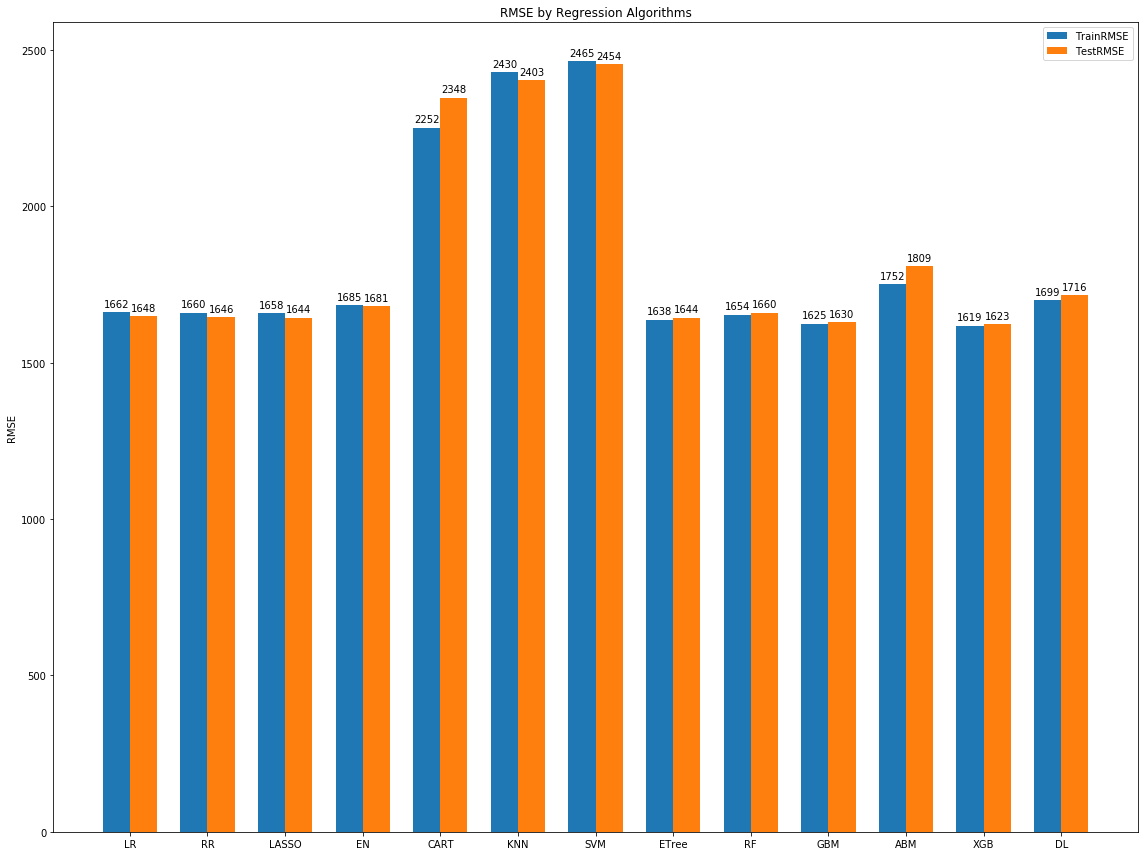

In [35]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = names

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

metrics1=[math.floor(item) for item in metrics1]
metrics2=[math.floor(item) for item in metrics2]

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, metrics1, width, label='TrainRMSE')
rects2 = ax.bar(x + width/2, metrics2, width, label='TestRMSE')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('RMSE')
ax.set_title('RMSE by Regression Algorithms')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [36]:
# if scale_flag:
#     feature_scaler = StandardScaler()
#     x_newdf[scale_cols] = feature_scaler.fit_transform(x_newdf[scale_cols])
# joblib.dump(feature_scaler, '../data/output/models/feature_scaler.pkl')

In [37]:
# for name, model in models:
#     model.fit( x_newdf,  y_newdf)

In [39]:
"""
models_name_list = []
for name, model in models:
    models_name_list.append(name)
    joblib.dump(model, '../data/output/models/'+name+'.pkl') 
models_name_list
"""

"\nmodels_name_list = []\nfor name, model in models:\n    models_name_list.append(name)\n    joblib.dump(model, '../data/output/models/'+name+'.pkl') \nmodels_name_list\n"

In [ ]:
models_name_list = ['EN', 'GBM', 'XGB']

In [ ]:
joblib.dump(models_name_list, '../data/output/models/models_name_list.txt')

In [ ]:
# Tuning algorithm #1 - ElasticNet
paramGrid1 = dict(alpha=np.array([1,2,3,4,5]),l1_ratio=np.array([0.1,0.5,1]),max_iter=np.array([500]))
model1 = ElasticNet(random_state=seedNum,normalize=False)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid1 = GridSearchCV(estimator=model1, param_grid=paramGrid1, scoring=scoring, cv=kfold)
grid_result1 = grid1.fit(x_train, y_train)

print("Best: %f using %s" % (math.sqrt(abs(grid_result1.best_score_)), grid_result1.best_params_))
results.append(grid_result1.cv_results_['mean_test_score'])
names.append('EN')
means = grid_result1.cv_results_['mean_test_score']
stds = grid_result1.cv_results_['std_test_score']
params = grid_result1.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    #print("%f (%f) with: %r" % (mean, stdev, param))
    print("%f with: %r" % (math.sqrt(abs(mean)), param))


In [ ]:
# Tuning algorithm #2 - Lasso
paramGrid1 = dict(alpha=np.array([1,2,3,4,5]),max_iter=np.array([500,1000,1500]))
model1 = Lasso(random_state=seedNum,normalize=False)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid1 = GridSearchCV(estimator=model1, param_grid=paramGrid1, scoring=scoring, cv=kfold)
grid_result1 = grid1.fit(x_train, y_train)

print("Best: %f using %s" % (math.sqrt(abs(grid_result1.best_score_)), grid_result1.best_params_))
results.append(grid_result1.cv_results_['mean_test_score'])
names.append('EN')
means = grid_result1.cv_results_['mean_test_score']
stds = grid_result1.cv_results_['std_test_score']
params = grid_result1.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    #print("%f (%f) with: %r" % (mean, stdev, param))
    print("%f with: %r" % (math.sqrt(abs(mean)), param))


In [ ]:
# Tuning algorithm #2 - GBM
paramGrid2 = dict(n_estimators=np.array([100,200,300,400]))
model2 = GradientBoostingRegressor(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid2 = GridSearchCV(estimator=model2, param_grid=paramGrid2, scoring=scoring, cv=kfold)
grid_result2 = grid2.fit(x_train, y_train)

print("Best: %f using %s" % (math.sqrt(abs(grid_result2.best_score_)), grid_result2.best_params_))
results.append(grid_result2.cv_results_['mean_test_score'])
names.append('GBM')
means = grid_result2.cv_results_['mean_test_score']
stds = grid_result2.cv_results_['std_test_score']
params = grid_result2.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f with: %r" % (math.sqrt(abs(mean)), param))

In [ ]:
"""
# Tuning algorithm #2 - Support Vector Machine
paramGrid2 = dict(C=np.array([0.1,1,10]),epsilon=np.array([0.01,0.1,0.5,1]),kernel=np.array(['linear', 'poly', 'rbf', 'sigmoid']))
model2 = SVR()
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid2 = GridSearchCV(estimator=model2, param_grid=paramGrid2, scoring=scoring, cv=kfold)
grid_result2 = grid2.fit(x_train, y_train)

print("Best: %f using %s" % (math.sqrt(abs(grid_result2.best_score_)), grid_result2.best_params_))
results.append(grid_result2.cv_results_['mean_test_score'])
names.append('SVM')
means = grid_result2.cv_results_['mean_test_score']
stds = grid_result2.cv_results_['std_test_score']
params = grid_result2.cv_results_['params']
      
for mean, stdev, param in zip(means, stds, params):
    print("%f with: %r" % (math.sqrt(abs(mean)), param))
    """